# Decision Trees

Decision trees are machine learning models that try to find patterns in the features of data points. Take a look at the tree on this page. This tree tries to predict whether a student will get an A on their next test.

By asking questions like “What is the student’s average grade in the class” the decision tree tries to get a better understanding of their chances on the next test.

In order to make a classification, this classifier needs a data point with four features:

- The student’s average grade in the class.
- The number of hours the student plans on studying for the test.
- The number of hours the student plans on sleeping the night before the test.
- Whether or not the student plans on cheating.


## Gini Impurity

Consider the two trees below. Which tree would be more useful as a model that tries to predict whether someone would get an A in a class?

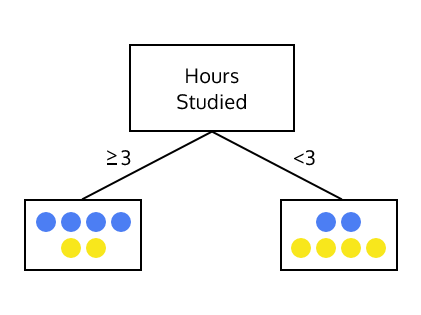

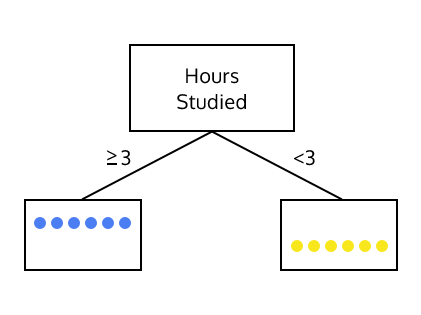

Let’s say you use the top tree. You’ll end up at a leaf node where the label is up for debate. The training data has labels from both classes! If you use the bottom tree, you’ll end up at a leaf where there’s only one type of label. There’s no debate at all! We’d be much more confident about our classification if we used the bottom tree.

This idea can be quantified by calculating the Gini impurity of a set of data points. To find the Gini impurity, start at 1 and subtract the squared percentage of each label in the set. For example, if a data set had three items of class A and one item of class B, the Gini impurity of the set would be

$ 1 - (3/4)**2 - (1/4)**2 = 0.375 $

If a data set has only one class, you’d end up with a Gini impurity of 0. The lower the impurity, the better the decision tree!

In [2]:
from collections import Counter

#labels = ["unacc", "unacc", "acc", "acc", "good", "good"]
#labels = ["unacc","unacc","unacc", "good", "vgood", "vgood"]
labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc"]

impurity = 1

label_counts = Counter(labels)

for label in label_counts:
  probability_of_label = label_counts[label] / len(labels)
  impurity -= probability_of_label ** 2

print(impurity)

0.0


## Information Gain

We know that we want to end up with leaves with a low Gini Impurity, but we still need to figure out which features to split on in order to achieve this. For example, is it better if we split our dataset of students based on how much sleep they got or how much time they spent studying?

To answer this question, we can calculate the information gain of splitting the data on a certain feature. Information gain measures difference in the impurity of the data before and after the split. For example, let’s say you had a dataset with an impurity of `0.5`. After splitting the data based on a feature, you end up with three groups with impurities 0, 0.375, and 0. The information gain of splitting the data in that way is `0.5 - 0 - 0.375 - 0 = 0.125`.

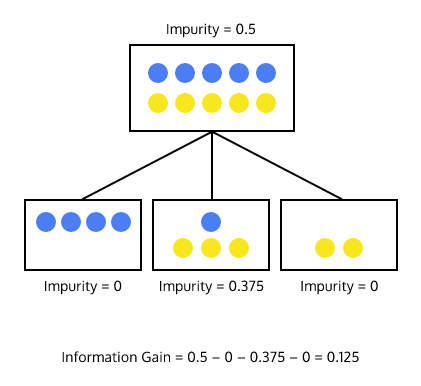

Not bad! By splitting the data in that way, we’ve gained some information about how the data is structured — the datasets after the split are purer than they were before the split. The higher the information gain the better — if information gain is 0, then splitting the data on that feature was useless! Unfortunately, right now it’s possible for information gain to be negative. In the next exercise, we’ll calculate weighted information gain to fix that problem.

In [3]:
unsplit_labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "good", "good", "vgood", "vgood", "vgood"]

split_labels_1 = [
  ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "vgood"], 
  [ "good", "good"], 
  ["vgood", "vgood"]
]

split_labels_2 = [
  ["unacc", "unacc", "unacc", "unacc","unacc", "unacc", "good", "good", "good", "good"], 
  ["vgood", "vgood", "vgood"]
]

def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

info_gain = gini(unsplit_labels)

for subset in split_labels_2:
  info_gain -= gini(subset)

print(info_gain)


0.15905325443786977


## Weighted Information Gain

We’re not quite done calculating the information gain of a set of objects. The sizes of the subset that get created after the split are important too! For example, the image below shows two sets with the same impurity. Which set would you rather have in your decision tree?

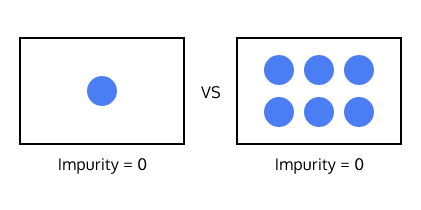

Both of these sets are perfectly pure, but the purity of the second set is much more meaningful. Because there are so many items in the second set, we can be confident that whatever we did to produce this set wasn’t an accident.

It might be helpful to think about the inverse as well. Consider these two sets with the same impurity:

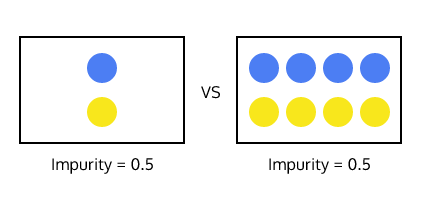

Both of these sets are completely impure. However, that impurity is much more meaningful in the set with more instances. We know that we are going to have to do a lot more work in order to completely separate the two classes. Meanwhile, the impurity of the set with two items isn’t as important. We know that we’ll only need to split the set one more time in order to make two pure sets.

Let’s modify the formula for information gain to reflect the fact that the size of the set is relevant. Instead of simply subtracting the impurity of each set, we’ll subtract the weighted impurity of each of the split sets. If the data before the split contained 20 items and one of the resulting splits contained 2 items, then the weighted impurity of that subset would be 2/20 * impurity. We’re lowering the importance of the impurity of sets with few elements.

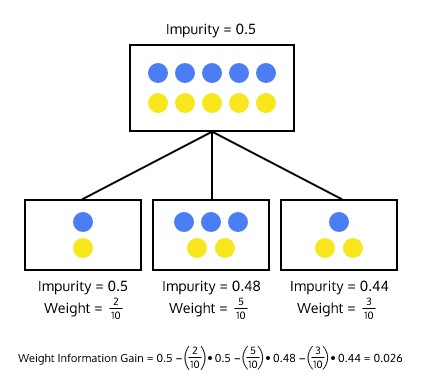

Now that we can calculate the information gain using weighted impurity, let’s do that for every possible feature. If we do this, we can find the best feature to split the data on.



In [5]:
cars = [['med', 'low', '3', '4', 'med', 'med'], 
        ['med', 'vhigh', '4', 'more', 'small', 'high'], 
        ['high', 'med', '3', '2', 'med', 'low'], 
        ['med', 'low', '4', '4', 'med', 'low'], 
        ['med', 'low', '5more', '2', 'big', 'med'], 
        ['med', 'med', '2', 'more', 'big', 'high'], 
        ['med', 'med', '2', 'more', 'med', 'med'], 
        ['vhigh', 'vhigh', '2', '2', 'med', 'low'], 
        ['high', 'med', '4', '2', 'big', 'low'], 
        ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']

def split(dataset, labels, column):
    data_subsets = []
    label_subsets = []
    counts = list(set([data[column] for data in dataset]))
    print(counts)
    counts.sort()
    for k in counts:
        new_data_subset = []
        new_label_subset = []
        for i in range(len(dataset)):
            if dataset[i][column] == k:
                new_data_subset.append(dataset[i])
                new_label_subset.append(labels[i])
        
        data_subsets.append(new_data_subset)
        label_subsets.append(new_label_subset)
    return data_subsets, label_subsets

def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset) * len(subset) / len(starting_labels)
  return info_gain

for i in range(2):
  split_data, split_labels = split(cars, car_labels, i)
  print(information_gain(car_labels, split_labels))

['low', 'med', 'high', 'vhigh']
[['high', 'med', '3', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low']]
['unacc', 'unacc']
[['low', 'low', '2', '4', 'big', 'med']]
['good']
[['med', 'low', '3', '4', 'med', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'high'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med']]
['acc', 'acc', 'unacc', 'unacc', 'vgood', 'acc']
[['vhigh', 'vhigh', '2', '2', 'med', 'low']]
['unacc']
0.27333333333333343
['low', 'med', 'vhigh']
[['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['low', 'low', '2', '4', 'big', 'med']]
['acc', 'unacc', 'unacc', 'good']
[['high', 'med', '3', '2', 'med', 'low'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med'], ['high', 'med', '4', '2', 'big', 'low']]
['unacc', 'vgood', 'acc', 'unacc']
[['m

## Decision Trees in scikit-learn

The sklearn.tree module contains the `DecisionTreeClassifier` class. To create a `DecisionTreeClassifier` object, call the constructor:

In [11]:
from sklearn.tree import DecisionTreeClassifier
from cars import training_points, training_labels, testing_points, testing_labels

classifier = DecisionTreeClassifier()

Next, we want to create the tree based on our training data. To do this, we’ll use the `.fit()` method.

`.fit()` takes a list of data points followed by a list of the labels associated with that data. Note that when we built our tree from scratch, our data points contained strings like `"vhigh"` or `"5more"`. When creating the tree using scikit-learn, it’s a good idea to map those strings to numbers. For example, for the first feature representing the price of the car, `"low"` would map to 1, `"med"` would map to 2, and so on.

In [13]:
classifier.fit(training_points, training_labels)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Finally, once we’ve made our tree, we can use it to classify new data points. The `.predict()` method takes an array of data points and will return an array of classifications for those data points.

In [10]:
predictions = classifier.predict(testing_points)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

If you’ve split your data into a test set, you can find the accuracy of the model by calling the `.score()` method using the test data and the test labels as parameters.

In [ ]:
print(classifier.score(testing_points, testing_labels))

`.score()` returns the percentage of data points from the test set that it classified correctly.

# Review

- Good decision trees have pure leaves. A leaf is pure if all of the data points in that class have the same label.
- Decision trees are created using a greedy algorithm that prioritizes finding the feature that results in the largest information gain when splitting the data using that feature.
- Creating an optimal decision tree is difficult. The greedy algorithm doesn’t always find the globally optimal tree.
- Decision trees often suffer from overfitting. Making the tree small by pruning helps to generalize the tree so it is more accurate on data in the real world.